--- STARTING EXPERIMENT 2 ---

1. Training Multi-Linear Regression...
Multi-Linear MSE: 0.5559
Multi-Linear R2:  0.5758

2. Training Lasso Regression (with Tuning)...
Best Alpha for Lasso: {'alpha': 0.001}
Lasso MSE: 0.5545
Lasso R2:  0.5769

3. Training Ridge Regression (with Tuning)...
Best Alpha for Ridge: {'alpha': 0.1}
Ridge MSE: 0.5559
Ridge R2:  0.5758


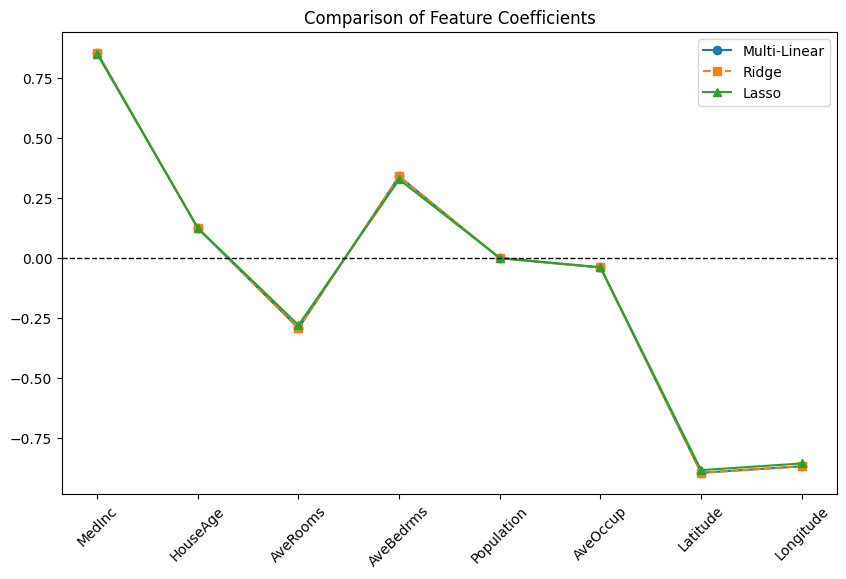

In [1]:
# --- IMPORTS ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# ==========================================
# EXPERIMENT 2: MULTI-LINEAR, LASSO, RIDGE
# Dataset: California Housing
# ==========================================
print("--- STARTING EXPERIMENT 2 ---")

# 1. Load Data
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

# 2. Preprocessing
# Split Data 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling (CRITICAL for Lasso and Ridge to work correctly)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- MODEL 1: MULTI-LINEAR REGRESSION (OLS) ---
print("\n1. Training Multi-Linear Regression...")
multi_model = LinearRegression()
multi_model.fit(X_train_scaled, y_train)
y_pred_multi = multi_model.predict(X_test_scaled)

mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)
print(f"Multi-Linear MSE: {mse_multi:.4f}")
print(f"Multi-Linear R2:  {r2_multi:.4f}")


# --- MODEL 2: LASSO REGRESSION (L1 Regularization) ---
print("\n2. Training Lasso Regression (with Tuning)...")
lasso = Lasso()
# Tuning 'alpha' (regularization strength)
params_lasso = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
grid_lasso = GridSearchCV(lasso, params_lasso, cv=5, scoring='r2')
grid_lasso.fit(X_train_scaled, y_train)

best_lasso = grid_lasso.best_estimator_
y_pred_lasso = best_lasso.predict(X_test_scaled)

print(f"Best Alpha for Lasso: {grid_lasso.best_params_}")
print(f"Lasso MSE: {mean_squared_error(y_test, y_pred_lasso):.4f}")
print(f"Lasso R2:  {r2_score(y_test, y_pred_lasso):.4f}")


# --- MODEL 3: RIDGE REGRESSION (L2 Regularization) ---
print("\n3. Training Ridge Regression (with Tuning)...")
ridge = Ridge()
# Tuning 'alpha'
params_ridge = {'alpha': [0.1, 1.0, 10.0, 100.0, 200.0]}
grid_ridge = GridSearchCV(ridge, params_ridge, cv=5, scoring='r2')
grid_ridge.fit(X_train_scaled, y_train)

best_ridge = grid_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_scaled)

print(f"Best Alpha for Ridge: {grid_ridge.best_params_}")
print(f"Ridge MSE: {mean_squared_error(y_test, y_pred_ridge):.4f}")
print(f"Ridge R2:  {r2_score(y_test, y_pred_ridge):.4f}")

# --- COMPARISON PLOT ---
# Visualizing how Lasso shrinks coefficients to zero
plt.figure(figsize=(10, 6))
plt.plot(housing.feature_names, multi_model.coef_, 'o-', label='Multi-Linear')
plt.plot(housing.feature_names, best_ridge.coef_, 's--', label='Ridge')
plt.plot(housing.feature_names, best_lasso.coef_, '^-', label='Lasso')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title("Comparison of Feature Coefficients")
plt.xticks(rotation=45)
plt.legend()
plt.show()